# DBScan

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

#Pre-processamento
from sklearn.preprocessing import StandardScaler

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# DBScan
from sklearn.cluster import DBSCAN

## Carregar a Base de Dados - Iris

In [9]:
original = sns.load_dataset('iris')
classes = original['species']
df = original.drop(columns = 'species')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# DBSCan

DBSCAN - Clustering espacial baseado em densidade de aplicações com ruído. Encontra amostras de núcleo de alta densidade e expande aglomerados deles. Bom para dados que contenham clusters de densidade semelhante.

Parâmetros

- **eps** - float, default=0.5 - A distância máxima entre duas amostras para uma ser considerada como no bairro do outro. Este não é um limite máximo nas distâncias de pontos dentro de um cluster. Este é o parâmetro DBSCAN mais importante para escolher adequadamente para o seu conjunto de dados e função de distância.
- **min_samples** - int, default=5 - O número de amostras (ou peso total) em um bairro para um ponto a ser considerado como um ponto central. Isso inclui o ponto em si.
- **metric** - string,ou callable, default='euclidean' - A métrica a ser usada ao calcular a distância entre instâncias em um array de recursos. X pode ser um Glossário, nesse caso, apenas elementos "não zero" podem ser considerados vizinhos para DBSCAN.
- **metric_params** - dict, default=None - Argumentos adicionais de palavras-chave para a função métrica.
- **algorithm** - {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ - O algoritmo a ser usado pelo módulo Mais Próximo para calcular distâncias pontuais e encontrar vizinhos mais próximos. Consulte a documentação do módulo Mais Próximoneighbors para obter detalhes.
- **leaf_size** - int, default=30 - O tamanho da folha passou para BallTree ou cKDTree. Isso pode afetar a velocidade da construção e consulta, bem como a memória necessária para armazenar a árvore. O valor ideal depende da natureza do problema.
- **p** - float, default=None - O poder da métrica de Minkowski a ser usado para calcular a distância entre os pontos. Se Nenhum, então (equivalente à distância euclidiana).p=2
- **n_jobs** - int, default=Nenhum - O número de trabalhos paralelos para executar. significa 1, a menos que em um contexto joblib.parallel_backend. significa usar todos os processadores. Consulte Glossário para obter mais detalhes.None-1

Atributos

- **core_sample_indices_** - ndarray de forma (n_core_samples,) - Índices de amostras de núcleo.
- **components_** - ndarray de forma (n_core_samples, n_features) - Cópia de cada amostra do núcleo encontrada por treinamento.
- **labels_** - ndarray de forma (n_samples) - Rótulos de cluster para cada ponto no conjunto de dados dado para caber(). Amostras ruimis recebem o rótulo -1.

In [39]:
agrupador = DBSCAN(eps=0.9, min_samples=5)
agrupador = agrupador.fit(df)

## Exibir as Classes

- Caso o valor seja nulo, então o dado não foi agrupado

In [40]:
previsao = agrupador.labels_
previsao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Exibir os Clusters

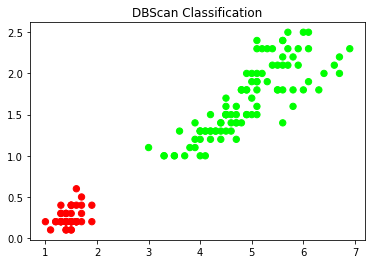

In [41]:
# Criar um mapa de cores
colormap = np.array(['red', 'lime', 'black'])

# Exibir a classificacao do modelo
plt.scatter(
    df['petal_length'],
    df['petal_width'],
    c = colormap[agrupador.labels_],
    s = 40
)
plt.title('DBScan Classification')

plt.show()